In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from importlib import reload
from dm_control import suite

from environments.observation_domains import estimate_domains
import environments
from environments import point
from environments import reacher_explore
from environments import hallway
from environments import ball_in_cup_explore
from environments import manipulator_explore
from environments import walker_explore
from environments import finger_explore

import utils

In [4]:
def render(physics, camera_id=None, height=480, width=480, **kwargs):
    args = {'height': height, 'width': width, **kwargs}
    if camera_id is not None:
        args['camera_id'] = camera_id
    img = physics.render(**args)
    plt.figure(figsize = (10,10))
    plt.imshow(img)

[ 0.06001402 -0.11531833]


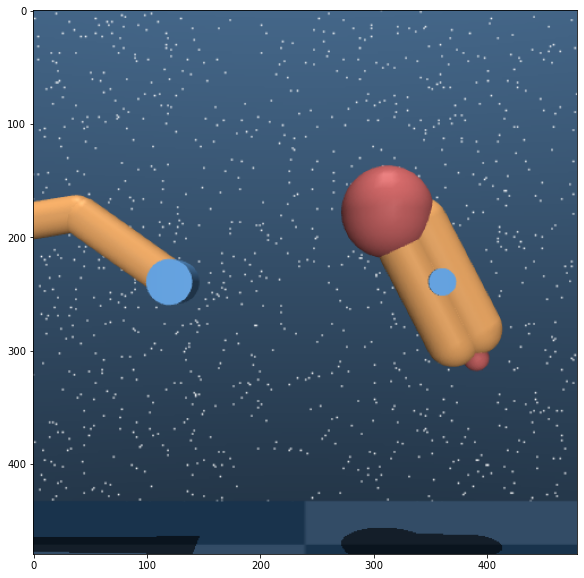

In [44]:
reload(finger_explore)
env = suite.load('finger_explore', 'turn_easy_narrow')
env.reset()
render(env.physics, camera_id='cam1')
# timestep = env.step(np.zeros(env.action_spec().shape))
# print(env.physics.torso_height(), env.physics.torso_upright(), timestep.reward)
print(env.physics.tip_position())

In [45]:
estimate_domains('finger_explore', 'turn_hard_narrow')

/home/will/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


(OrderedDict([('position',
               DeviceArray([-2.179993  , -2.1034486 , -0.12187555, -0.12980735], dtype=float32)),
              ('velocity',
               DeviceArray([-15.087244 ,  -7.797909 ,  -7.9138737], dtype=float32)),
              ('touch', DeviceArray([0., 0.], dtype=float32)),
              ('target_position',
               DeviceArray([-0.05214468,  0.11221937], dtype=float32)),
              ('dist_to_target', DeviceArray(0.14850369, dtype=float32))]),
 OrderedDict([('position',
               DeviceArray([ 2.7180636 ,  2.1140993 ,  0.05580011, -0.04523661], dtype=float32)),
              ('velocity',
               DeviceArray([10.232883,  8.220432, 11.789741], dtype=float32)),
              ('touch', DeviceArray([5.0791154, 5.346728 ], dtype=float32)),
              ('target_position',
               DeviceArray([0.06562632, 0.12457726], dtype=float32)),
              ('dist_to_target', DeviceArray(0.22419202, dtype=float32))]))

In [5]:
estimate_domains('finger', 'turn_hard')

/home/will/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


(OrderedDict([('position',
               DeviceArray([-2.1739388 , -2.1202974 , -0.12999591, -0.12999931], dtype=float32)),
              ('velocity',
               DeviceArray([-12.769091,  -8.170819, -15.452225], dtype=float32)),
              ('touch', DeviceArray([0., 0.], dtype=float32)),
              ('target_position',
               DeviceArray([-0.12930682, -0.12895967], dtype=float32)),
              ('dist_to_target', DeviceArray(-0.02870318, dtype=float32))]),
 OrderedDict([('position',
               DeviceArray([2.2130282 , 2.1193569 , 0.12999105, 0.12999973], dtype=float32)),
              ('velocity',
               DeviceArray([12.779068,  8.434241, 20.988222], dtype=float32)),
              ('touch', DeviceArray([6.1171966, 6.764843 ], dtype=float32)),
              ('target_position',
               DeviceArray([0.1295598 , 0.12992701], dtype=float32)),
              ('dist_to_target', DeviceArray(0.22999999, dtype=float32))]))

In [6]:
env = suite.load('walker', 'walk')
timestep = env.reset()
timestep.observation['velocity'].shape

(9,)

In [1]:
from dm_control import manipulation

/home/will/anaconda3/lib/python3.7/site-packages/dm_control/utils/containers.py:30: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class TaggedTasks(collections.Mapping):


In [4]:
print('\n'.join(manipulation.ALL))

stack_2_bricks_features
stack_2_bricks_vision
stack_2_bricks_moveable_base_features
stack_2_bricks_moveable_base_vision
stack_3_bricks_features
stack_3_bricks_vision
stack_3_bricks_random_order_features
stack_2_of_3_bricks_random_order_features
stack_2_of_3_bricks_random_order_vision
reassemble_3_bricks_fixed_order_features
reassemble_3_bricks_fixed_order_vision
reassemble_5_bricks_random_order_features
reassemble_5_bricks_random_order_vision
lift_brick_features
lift_brick_vision
lift_large_box_features
lift_large_box_vision
place_brick_features
place_brick_vision
place_cradle_features
place_cradle_vision
reach_duplo_features
reach_duplo_vision
reach_site_features
reach_site_vision


/home/will/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
env = manipulation.load('lift_brick_features')

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/will/anaconda3/lib/python3.7/site-packages/dm_control/composer/observation/observable/mjcf.py:41: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(obj_iterable, collections.Iterable):
/home/will/anaconda3/lib/python3.7/site-packages/dm_control/manipulation/lift.py:74: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  site_positions = np.vstack

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(55,)

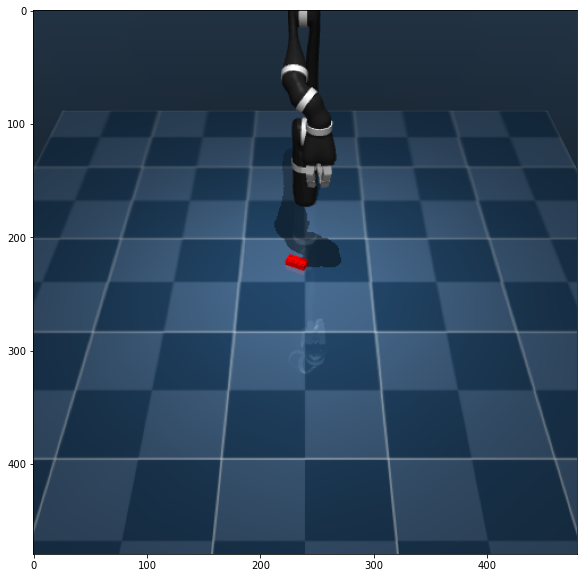

In [13]:
env.reset()
render(env.physics)
timestep = env.reset()
utils.flatten_observation(timestep.observation).shape

In [16]:
env = suite.load('fish', 'swim')
timestep = env.reset()
utils.flatten_observation(timestep.observation).shape

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(24,)